In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
import pandas as pd
from scipy.stats import ttest_ind, pearsonr

In [3]:
df = pd.read_csv("/content/AirQuality.csv")

In [4]:
df.shape

(9471, 17)

In [5]:
df.describe()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,0.0,0.0
mean,-34.207524,1048.990061,-159.090093,1.865683,894.595276,168.616971,794.990168,58.148873,1391.479641,975.072032,9.778305,39.485380,-6.837604,NaN,NaN
std,77.657170,329.832710,139.789093,41.380206,342.333252,257.433866,321.993552,126.940455,467.210125,456.938184,43.203623,51.216145,38.976670,NaN,NaN
min,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,NaN,NaN
25%,0.600000,921.000000,-200.000000,4.000000,711.000000,50.000000,637.000000,53.000000,1185.000000,700.000000,10.900000,34.100000,0.692300,NaN,NaN
50%,1.500000,1053.000000,-200.000000,7.900000,895.000000,141.000000,794.000000,96.000000,1446.000000,942.000000,17.200000,48.600000,0.976800,NaN,NaN
75%,2.600000,1221.000000,-200.000000,13.600000,1105.000000,284.000000,960.000000,133.000000,1662.000000,1255.000000,24.100000,61.900000,1.296200,NaN,NaN
max,11.900000,2040.000000,1189.000000,63.700000,2214.000000,1479.000000,2683.000000,340.000000,2775.000000,2523.000000,44.600000,88.700000,2.231000,NaN,NaN


In [6]:
df = df.drop(columns=['NMHC(GT)','Unnamed: 15', 'Unnamed: 16'])

In [7]:
df.head()

,Date,Time,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10-03-2004,18:00:00,2.6,1360.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,10-03-2004,19:00:00,2.0,1292.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,10-03-2004,20:00:00,2.2,1402.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,10-03-2004,21:00:00,2.2,1376.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,10-03-2004,22:00:00,1.6,1272.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


<Axes: xlabel='PT08.S1(CO)', ylabel='Count'>

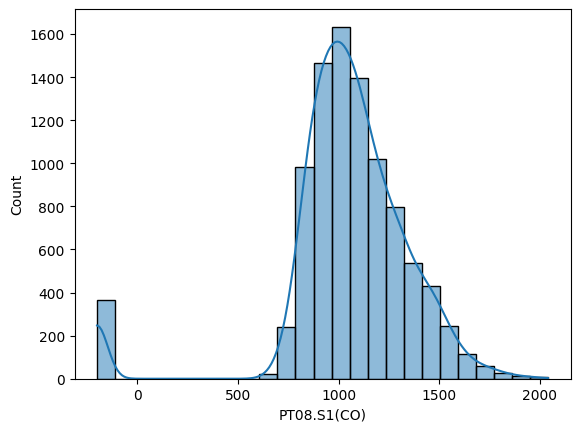

In [8]:
sns.histplot(df, x='PT08.S1(CO)',kde=True,bins=25)

<Axes: xlabel='PT08.S2(NMHC)', ylabel='Count'>

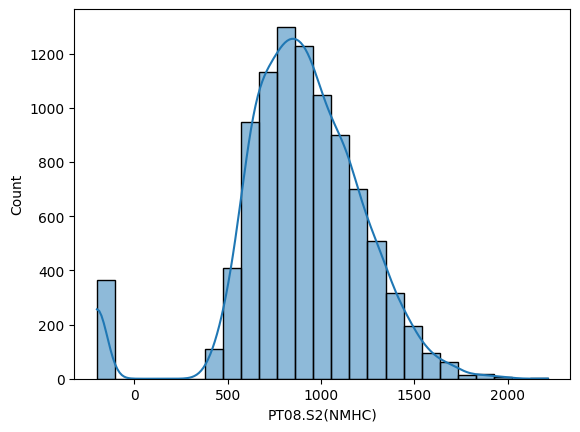

In [9]:
sns.histplot(df, x='PT08.S2(NMHC)',kde=True,bins=25)

<Axes: xlabel='PT08.S1(CO)', ylabel='PT08.S2(NMHC)'>

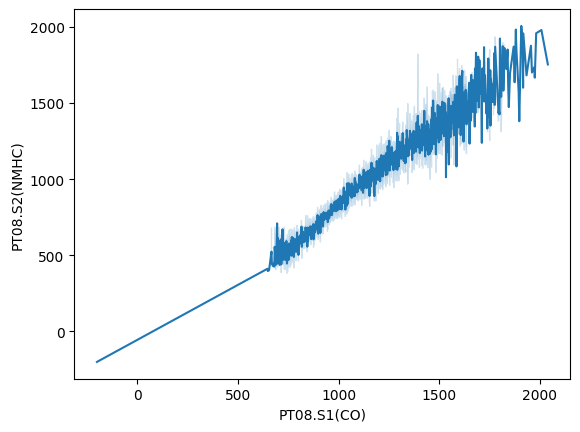

In [10]:
sns.lineplot(df,y='PT08.S2(NMHC)', x='PT08.S1(CO)')

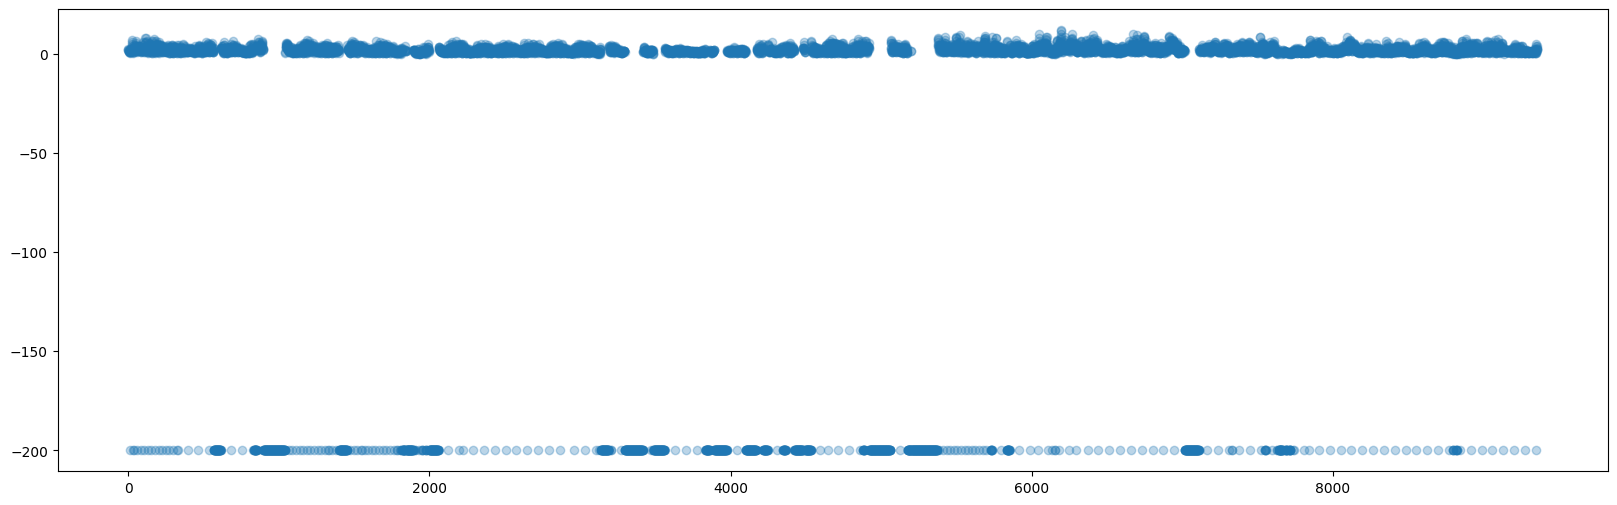

In [11]:
plt.figure(figsize=(20,6))
plt.scatter(df.index,df['CO(GT)'],alpha=0.3)
plt.show(block=False)

In [12]:
df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], errors='coerce')
df.set_index('Datetime', inplace=True)

df.drop(columns=['Date', 'Time'], inplace=True)

In [13]:
df.replace(-200, pd.NA, inplace=True)
for col in df.columns:
    if df[col].dtype == 'object':  # Check for non-numeric columns
        df[col] = pd.to_numeric(df[col], errors='coerce')

# Fill missing values with column means for numeric columns
df.fillna(df.mean(numeric_only=True), inplace=True)


In [14]:
correlation_matrix = df.select_dtypes(include='number').corr()


correlation_matrix

,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
CO(GT),1.000000,0.773394,0.812361,0.795578,0.762273,-0.613877,0.646349,0.558232,0.759027,0.020257,0.043198,0.043274
PT08.S1(CO),0.773394,1.000000,0.883795,0.892964,0.615941,-0.771938,0.562843,0.682881,0.899324,0.048627,0.114606,0.135324
C6H6(GT),0.812361,0.883795,1.000000,0.981950,0.616801,-0.735744,0.535919,0.765731,0.865689,0.198956,-0.061681,0.167972
PT08.S2(NMHC),0.795578,0.892964,0.981950,1.000000,0.601773,-0.796703,0.561180,0.777254,0.880578,0.241373,-0.090380,0.186933
NOx(GT),0.762273,0.615941,0.616801,0.601773,1.000000,-0.563270,0.763074,0.205485,0.688205,-0.235636,0.192587,-0.126868
PT08.S3(NOx),-0.613877,-0.771938,-0.735744,-0.796703,-0.563270,1.000000,-0.569479,-0.538468,-0.796569,-0.145112,-0.056740,-0.232017
NO2(GT),0.646349,0.562843,0.535919,0.561180,0.763074,-0.569479,1.000000,0.140655,0.629443,-0.165466,-0.080569,-0.291392
PT08.S4(NO2),0.558232,0.682881,0.765731,0.777254,0.205485,-0.538468,0.140655,1.000000,0.591144,0.561270,-0.032188,0.629641
PT08.S5(O3),0.759027,0.899324,0.865689,0.880578,0.688205,-0.796569,0.629443,0.591144,1.000000,-0.027172,0.124956,0.070751
T,0.020257,0.048627,0.198956,0.241373,-0.235636,-0.145112,-0.165466,0.561270,-0.027172,1.000000,-0.578621,0.656397


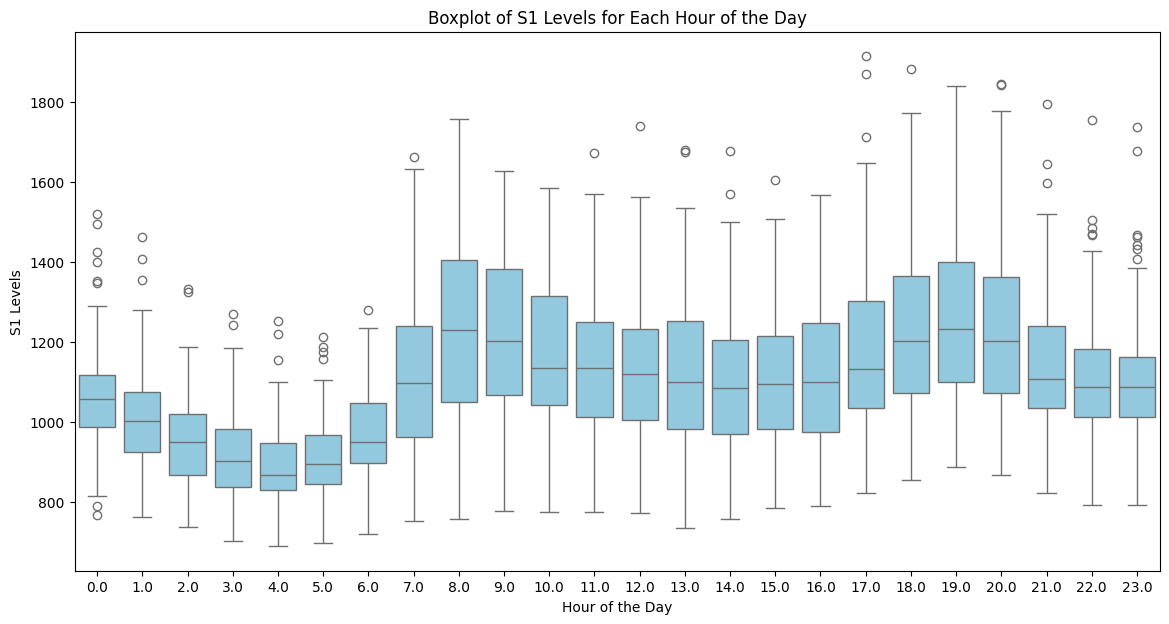

In [16]:
plt.figure(figsize=(14, 7))
sns.boxplot(x=df.index.hour, y=df['PT08.S1(CO)'], color='skyblue')
plt.title('Boxplot of S1 Levels for Each Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('S1 Levels')
plt.show()

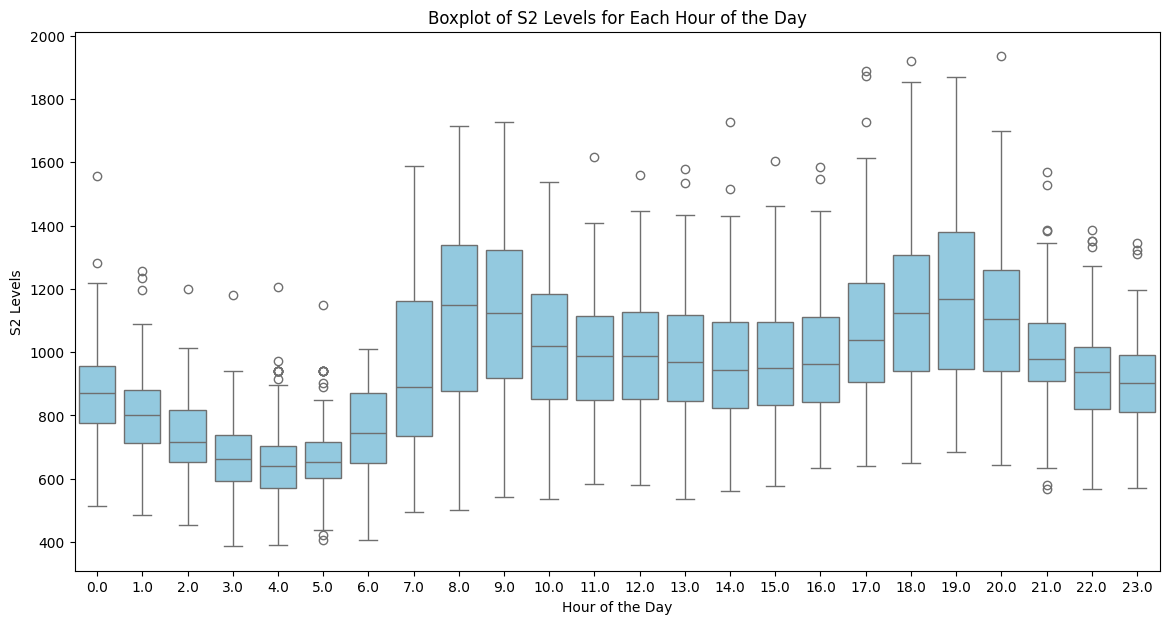

In [17]:
plt.figure(figsize=(14, 7))
sns.boxplot(x=df.index.hour, y=df['PT08.S2(NMHC)'], color='skyblue')
plt.title('Boxplot of S2 Levels for Each Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('S2 Levels')
plt.show()

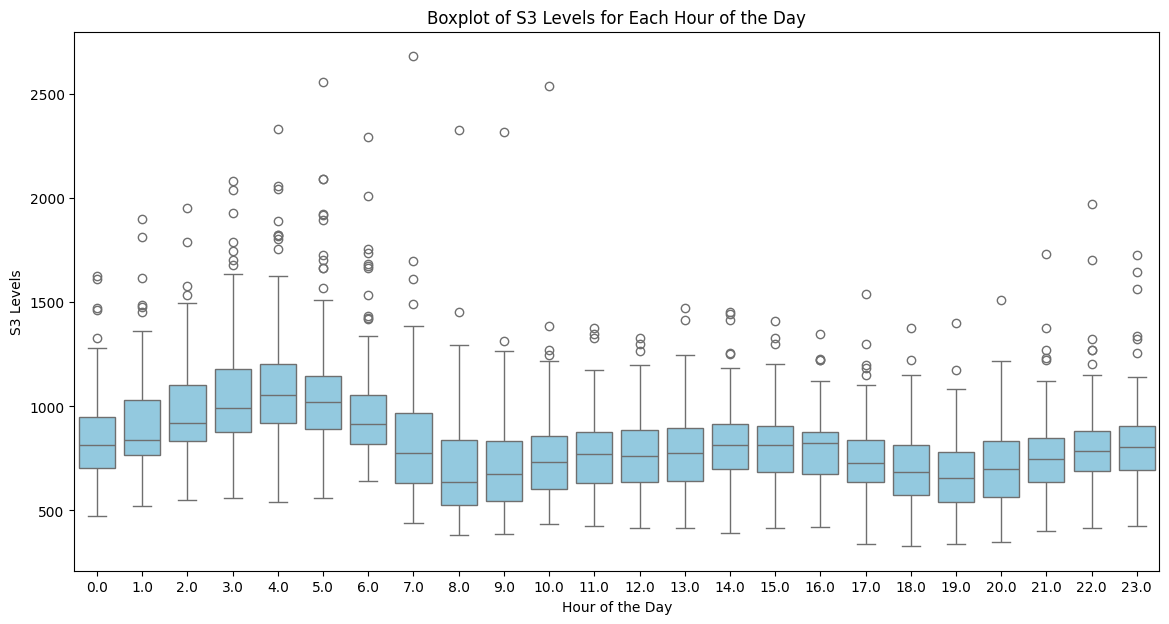

In [18]:
plt.figure(figsize=(14, 7))
sns.boxplot(x=df.index.hour, y=df['PT08.S3(NOx)'], color='skyblue')
plt.title('Boxplot of S3 Levels for Each Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('S3 Levels')
plt.show()

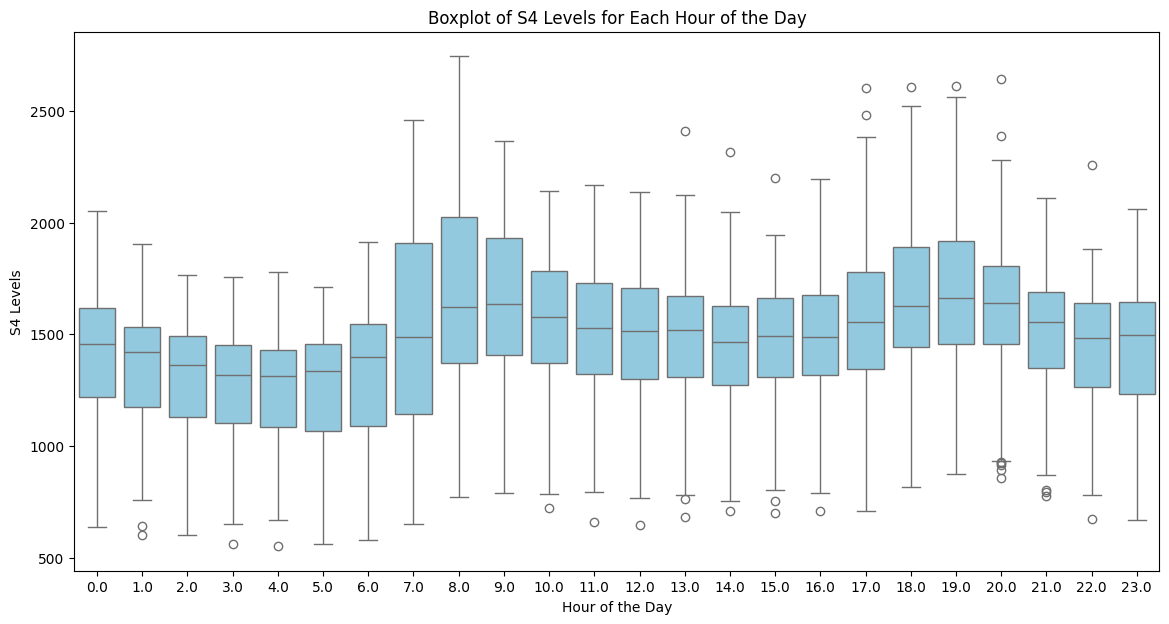

In [19]:
plt.figure(figsize=(14, 7))
sns.boxplot(x=df.index.hour, y=df['PT08.S4(NO2)'], color='skyblue')
plt.title('Boxplot of S4 Levels for Each Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('S4 Levels')
plt.show()

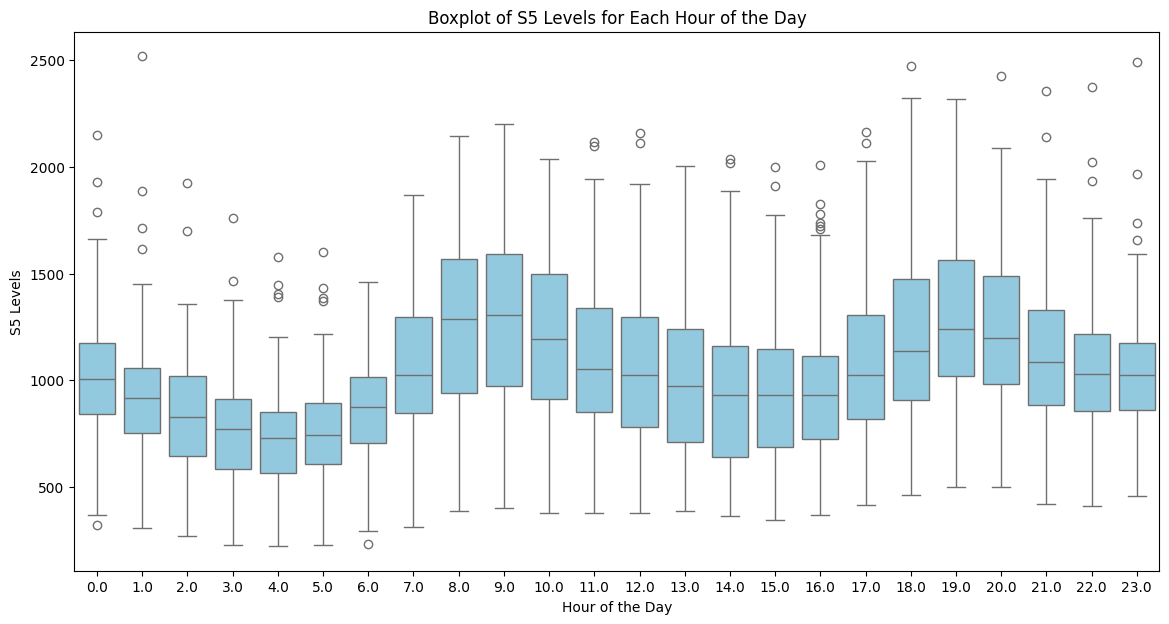

In [20]:
plt.figure(figsize=(14, 7))
sns.boxplot(x=df.index.hour, y=df['PT08.S5(O3)'], color='skyblue')
plt.title('Boxplot of S5 Levels for Each Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('S5 Levels')
plt.show()

## Hypothesis of PT08.S1(CO) significance


In [53]:
"df['Hour'] = df.index.hour
df['Period'] = ['Day' if 6 <= hour < 18 else 'Night' for hour in df['Hour']]


day_co = df[df['Period'] == 'Day']['PT08.S1(CO)']
night_co = df[df['Period'] == 'Night']['PT08.S1(CO)']


t_stat, p_value = ttest_ind(day_co, night_co, equal_var=False)


print(f"T-Statistic: {t_stat}")
print(f"P-value: {p_value}")


alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: The mean PT08.S1(CO) levels are significantly different between day and night.")
else:
    print("Fail to reject the null hypothesis: The mean PT08.S1(CO) levels are not significantly different between day and night.")

T-Statistic: 7.611763462948506
P-value: 3.6332220751460694e-14
Reject the null hypothesis: The mean PT08.S1(CO) levels are significantly different between day and night.


<ipython-input-34-93617f5d1e10>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['Period'], y=df['PT08.S1(CO)'], palette='Set2')


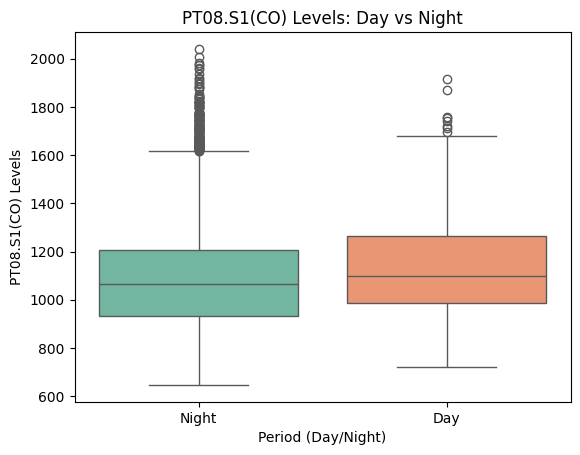

In [34]:
sns.boxplot(x=df['Period'], y=df['PT08.S1(CO)'], palette='Set2')
plt.title('PT08.S1(CO) Levels: Day vs Night')
plt.xlabel('Period (Day/Night)')
plt.ylabel('PT08.S1(CO) Levels')
plt.show()

## Hypothesis of PT08.S2(NMHC) significance

In [54]:
df['Hour'] = df.index.hour
df['Period'] = ['Day' if 6 <= hour < 18 else 'Night' for hour in df['Hour']]


day_co = df[df['Period'] == 'Day']['PT08.S2(NMHC)']
night_co = df[df['Period'] == 'Night']['PT08.S2(NMHC)']


t_stat, p_value = ttest_ind(day_co, night_co, equal_var=False)


print(f"T-Statistic: {t_stat}")
print(f"P-value: {p_value}")


alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: The mean PT08.S2(NMHC) levels are significantly different between day and night.")
else:
    print("Fail to reject the null hypothesis: The mean PT08.S2(NMHC) levels are not significantly different between day and night.")

T-Statistic: 9.888249506813741
P-value: 1.0623142774383763e-22
Reject the null hypothesis: The mean PT08.S2(NMHC) levels are significantly different between day and night.


<ipython-input-55-545102528e07>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['Period'], y=df['PT08.S2(NMHC)'], palette='Set2')


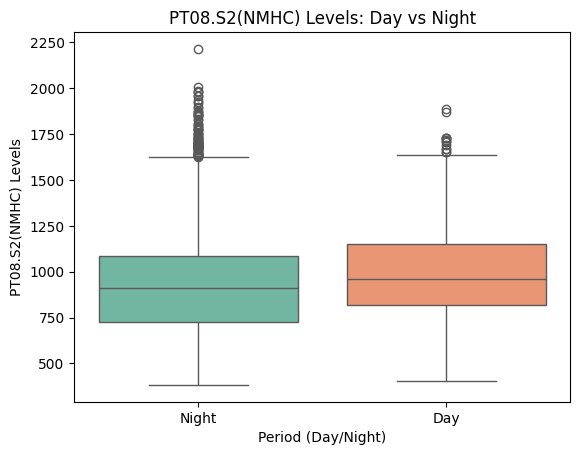

In [55]:
sns.boxplot(x=df['Period'], y=df['PT08.S2(NMHC)'], palette='Set2')
plt.title('PT08.S2(NMHC) Levels: Day vs Night')
plt.xlabel('Period (Day/Night)')
plt.ylabel('PT08.S2(NMHC) Levels')
plt.show()

## Hypothesis of PT08.S3(NOx) significance

In [62]:
df['Hour'] = df.index.hour
df['Period'] = ['Day' if 6 <= hour < 18 else 'Night' for hour in df['Hour']]


day_co = df[df['Period'] == 'Day']['PT08.S3(NOx)']
night_co = df[df['Period'] == 'Night']['PT08.S3(NOx)']


t_stat, p_value = ttest_ind(day_co, night_co, equal_var=False)


print(f"T-Statistic: {t_stat}")
print(f"P-value: {p_value}")


alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: The mean PT08.S3(NOx) levels are significantly different between day and night.")
else:
    print("Fail to reject the null hypothesis: The mean PT08.S3(NOx) levels are not significantly different between day and night")

T-Statistic: -9.140478472685405
P-value: 1.1348362638545212e-19
Reject the null hypothesis: The mean PT08.S3(NOx) levels are significantly different between day and night.


<ipython-input-61-5cc72371930b>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['Period'], y=df['PT08.S3(NOx)'], palette='Set2')


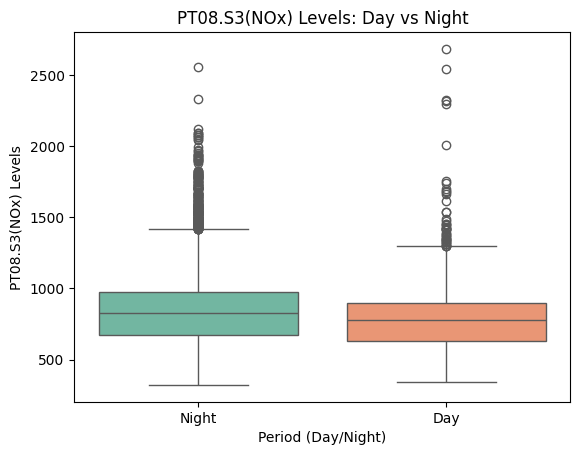

In [61]:
sns.boxplot(x=df['Period'], y=df['PT08.S3(NOx)'], palette='Set2')
plt.title('PT08.S3(NOx) Levels: Day vs Night')
plt.xlabel('Period (Day/Night)')
plt.ylabel('PT08.S3(NOx) Levels')
plt.show()

## Hypothesis of PT08.S4(NO2) significance

In [63]:
df['Hour'] = df.index.hour
df['Period'] = ['Day' if 6 <= hour < 18 else 'Night' for hour in df['Hour']]


day_co = df[df['Period'] == 'Day']['PT08.S4(NO2)']
night_co = df[df['Period'] == 'Night']['PT08.S4(NO2)']


t_stat, p_value = ttest_ind(day_co, night_co, equal_var=False)


print(f"T-Statistic: {t_stat}")
print(f"P-value: {p_value}")


alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: The mean PT08.S4(NO2) levels are significantly different between day and night.")
else:
    print("Fail to reject the null hypothesis: The mean PT08.S4(NO2) levels are not significantly different between day and night")

T-Statistic: 7.075385376369315
P-value: 1.90641577651294e-12
Reject the null hypothesis: The mean PT08.S4(NO2) levels are significantly different between day and night.


<ipython-input-64-b29f0ed28c68>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['Period'], y=df['PT08.S4(NO2)'], palette='Set2')


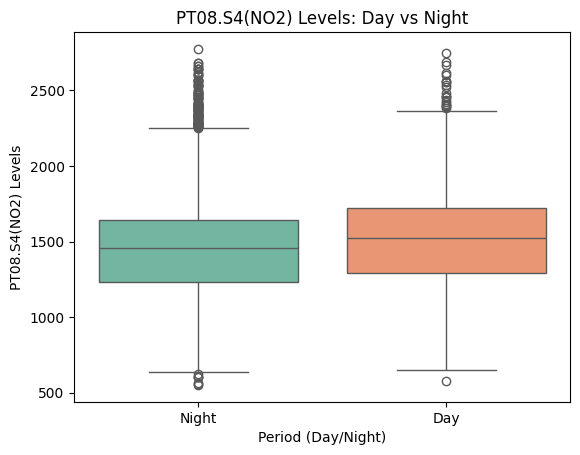

In [64]:
sns.boxplot(x=df['Period'], y=df['PT08.S4(NO2)'], palette='Set2')
plt.title('PT08.S4(NO2) Levels: Day vs Night')
plt.xlabel('Period (Day/Night)')
plt.ylabel('PT08.S4(NO2) Levels')
plt.show()

## Hypothesis of PT08.S5(O3) significance

In [65]:
df['Hour'] = df.index.hour
df['Period'] = ['Day' if 6 <= hour < 18 else 'Night' for hour in df['Hour']]


day_co = df[df['Period'] == 'Day']['PT08.S5(O3)']
night_co = df[df['Period'] == 'Night']['PT08.S5(O3)']


t_stat, p_value = ttest_ind(day_co, night_co, equal_var=False)


print(f"T-Statistic: {t_stat}")
print(f"P-value: {p_value}")


alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: The mean PT08.S5(O3) levels are significantly different between day and night.")
else:
    print("Fail to reject the null hypothesis: The mean PT08.S5(O3) levels are not significantly different between day and night")

T-Statistic: 4.260896397692891
P-value: 2.1044075258252172e-05
Reject the null hypothesis: The mean PT08.S5(O3) levels are significantly different between day and night.


<ipython-input-66-371eb572d2ac>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['Period'], y=df['PT08.S5(O3)'], palette='Set2')


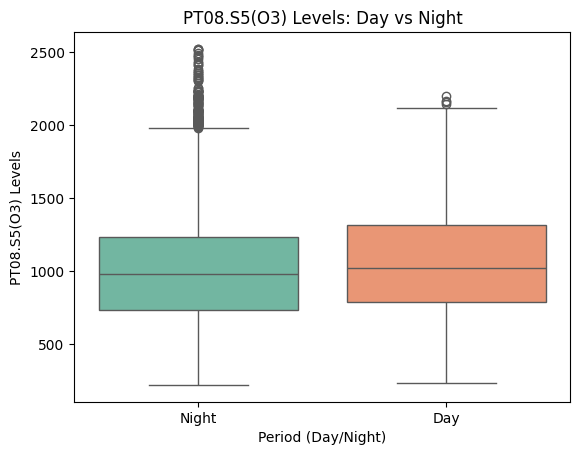

In [66]:
sns.boxplot(x=df['Period'], y=df['PT08.S5(O3)'], palette='Set2')
plt.title('PT08.S5(O3) Levels: Day vs Night')
plt.xlabel('Period (Day/Night)')
plt.ylabel('PT08.S5(O3) Levels')
plt.show()

# Day wise

<ipython-input-47-f8397cc88c7d>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Date Group', y='PT08.S1(CO)', data=df, palette='coolwarm')


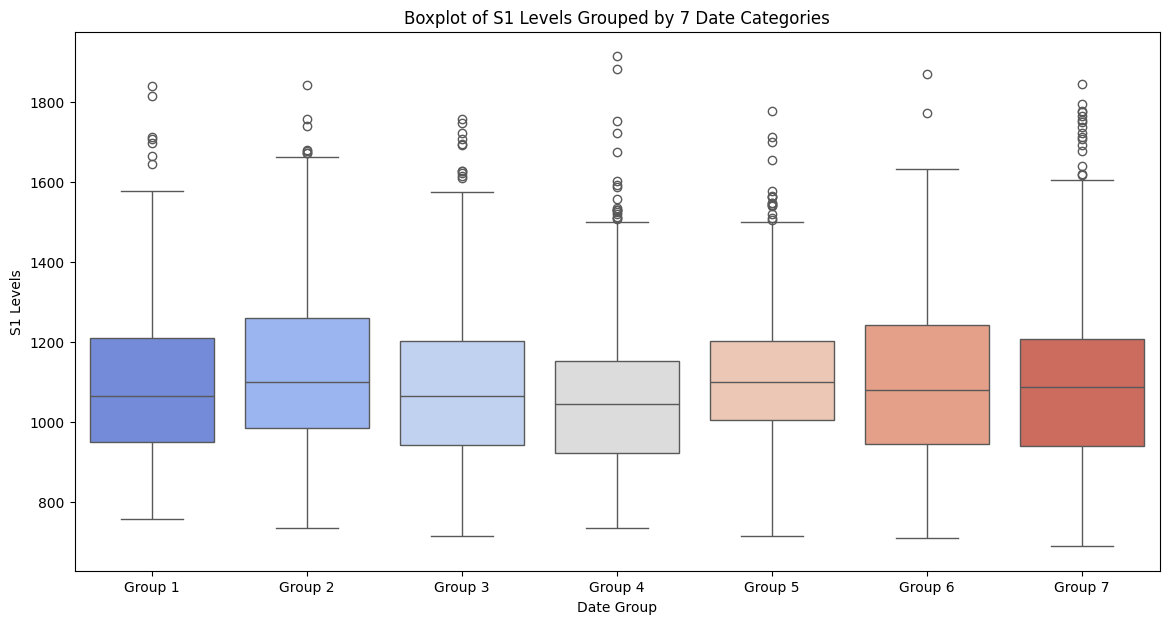

In [47]:
# Assuming df is your DataFrame and it has a datetime index
df['Date Group'] = ((df.index.dayofyear - 1) % 7) + 1  # Create date groups (1 to 7)

# Plot boxplot for the grouped data
plt.figure(figsize=(14, 7))
sns.boxplot(x='Date Group', y='PT08.S1(CO)', data=df, palette='coolwarm')
plt.title('Boxplot of S1 Levels Grouped by 7 Date Categories')
plt.xlabel('Date Group')
plt.ylabel('S1 Levels')
plt.xticks(ticks=range(7), labels=[f'Group {i}' for i in range(1, 8)])  # Custom x-axis labels
plt.show()

<ipython-input-41-7eb9eefc8c94>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Date Group', y='PT08.S2(NMHC)', data=df, palette='coolwarm')


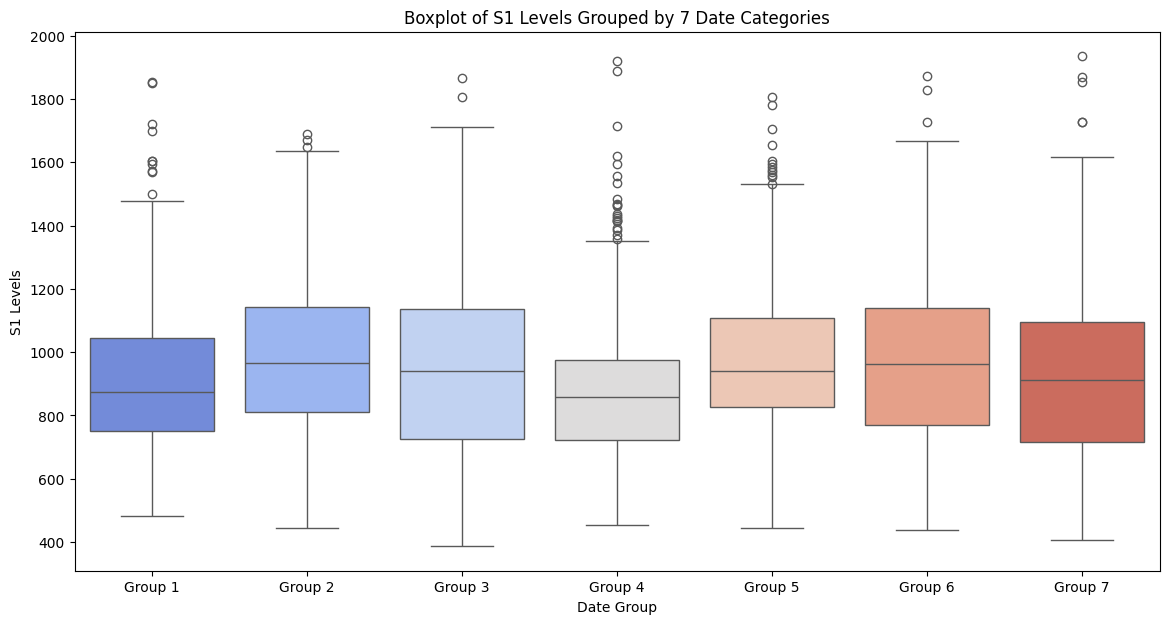

In [41]:
# Assuming df is your DataFrame and it has a datetime index
df['Date Group'] = ((df.index.dayofyear - 1) % 7) + 1  # Create date groups (1 to 7)

# Plot boxplot for the grouped data
plt.figure(figsize=(14, 7))
sns.boxplot(x='Date Group', y='PT08.S2(NMHC)', data=df, palette='coolwarm')
plt.title('Boxplot of S1 Levels Grouped by 7 Date Categories')
plt.xlabel('Date Group')
plt.ylabel('S1 Levels')
plt.xticks(ticks=range(7), labels=[f'Group {i}' for i in range(1, 8)])  # Custom x-axis labels
plt.show()

<ipython-input-67-e3c575e3d04c>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Date Group', y='PT08.S3(NOx)', data=df, palette='coolwarm')


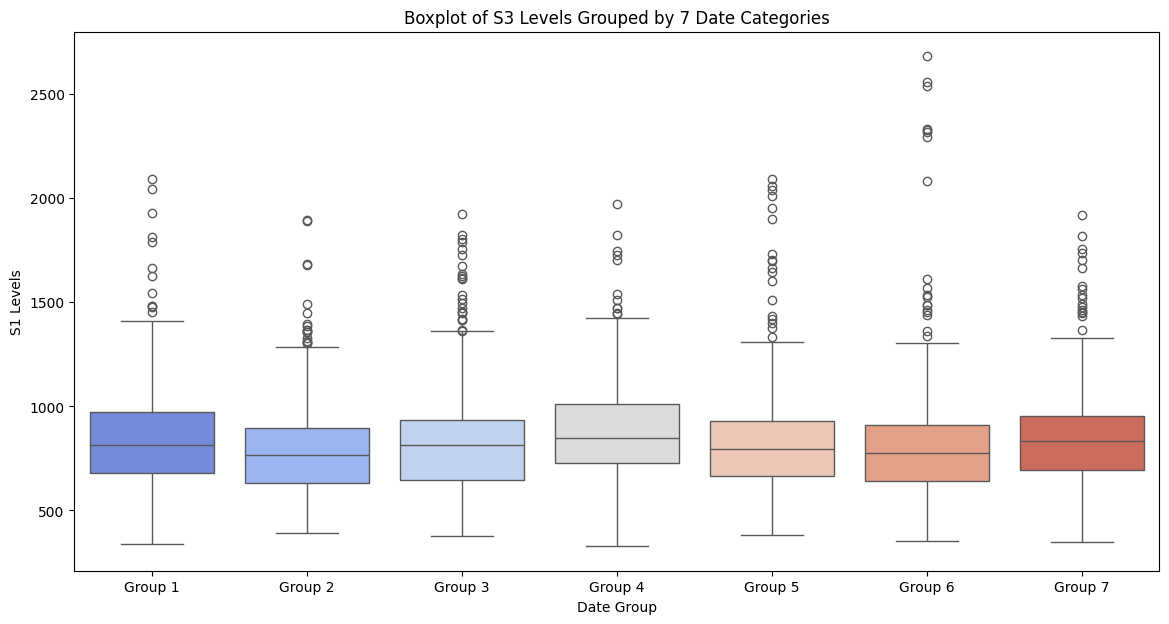

In [67]:
# Assuming df is your DataFrame and it has a datetime index
df['Date Group'] = ((df.index.dayofyear - 1) % 7) + 1  # Create date groups (1 to 7)

# Plot boxplot for the grouped data
plt.figure(figsize=(14, 7))
sns.boxplot(x='Date Group', y='PT08.S3(NOx)', data=df, palette='coolwarm')
plt.title('Boxplot of S3 Levels Grouped by 7 Date Categories')
plt.xlabel('Date Group')
plt.ylabel('S1 Levels')
plt.xticks(ticks=range(7), labels=[f'Group {i}' for i in range(1, 8)])  # Custom x-axis labels
plt.show()

<ipython-input-49-d7ac59b822d0>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Date Group', y='PT08.S4(NO2)', data=df, palette='coolwarm')


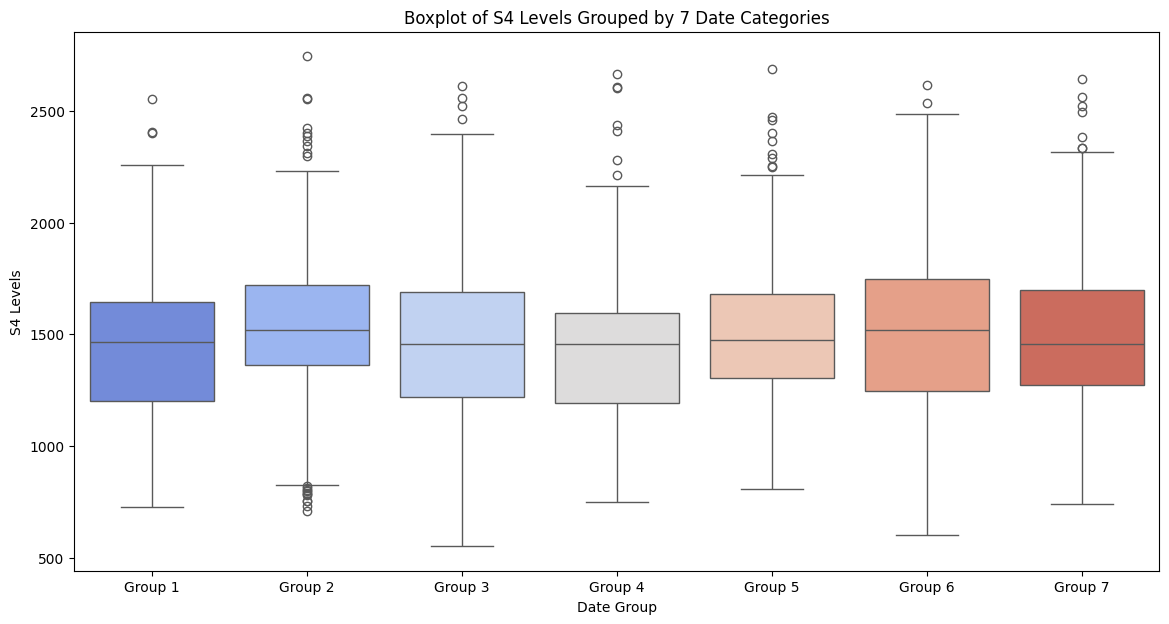

In [49]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='WeekPart', y='PT08.S1(CO)', data=df, palette='coolwarm')
plt.title('Weekend vs Weekday S1 Levels')
plt.xlabel('Week Part')
plt.ylabel('PT08.S1(CO) Levels')
plt.show()# Assuming df is your DataFrame and it has a datetime index
df['Date Group'] = ((df.index.dayofyear - 1) % 7) + 1  # Create date groups (1 to 7)

# Plot boxplot for the grouped data
plt.figure(figsize=(14, 7))
sns.boxplot(x='Date Group', y='PT08.S4(NO2)', data=df, palette='coolwarm')
plt.title('Boxplot of S4 Levels Grouped by 7 Date Categories')
plt.xlabel('Date Group')
plt.ylabel('S4 Levels')
plt.xticks(ticks=range(7), labels=[f'Group {i}' for i in range(1, 8)])  # Custom x-axis labels
plt.show()

<ipython-input-51-00d52caf23bf>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Date Group', y='PT08.S5(O3)', data=df, palette='coolwarm')


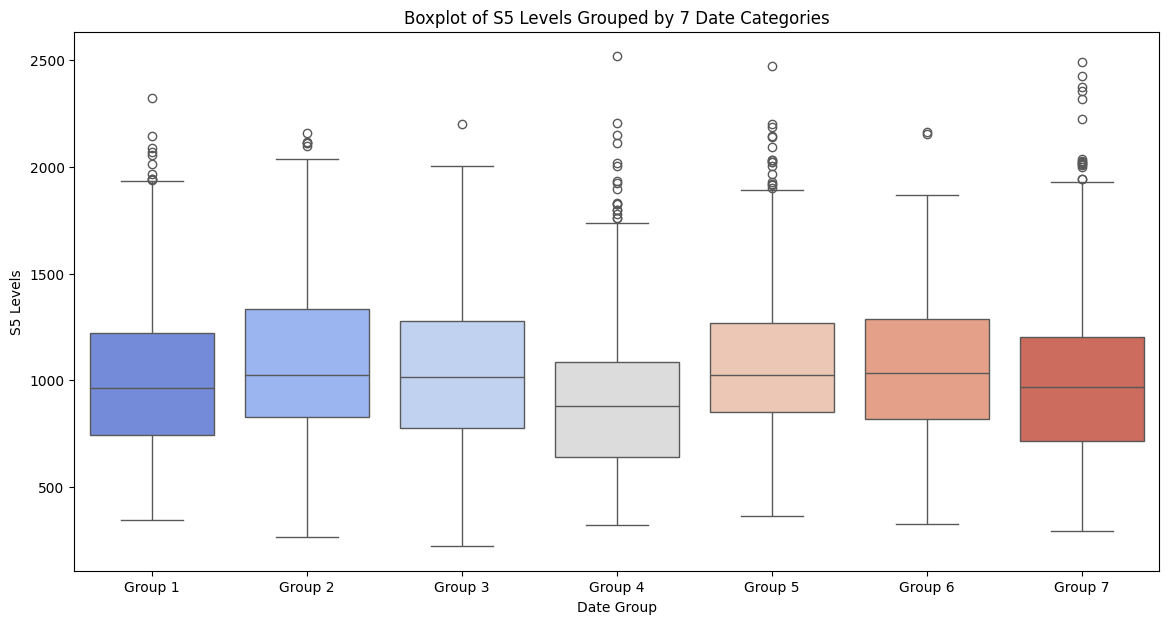

In [51]:
# Assuming df is your DataFrame and it has a datetime index
df['Date Group'] = ((df.index.dayofyear - 1) % 7) + 1  # Create date groups (1 to 7)

# Plot boxplot for the grouped data
plt.figure(figsize=(14, 7))
sns.boxplot(x='Date Group', y='PT08.S5(O3)', data=df, palette='coolwarm')
plt.title('Boxplot of S5 Levels Grouped by 7 Date Categories')
plt.xlabel('Date Group')
plt.ylabel('S5 Levels')
plt.xticks(ticks=range(7), labels=[f'Group {i}' for i in range(1, 8)])  # Custom x-axis labels
plt.show()

## Hypothesis testing weekly for PT08.1(CO)

In [40]:
df['WeekPart'] = df['Date Group'].apply(lambda x: 'Weekend' if x in [3, 4] else 'Weekday')

# Split data into weekdays and weekends
weekend_data = df[df['WeekPart'] == 'Weekend']['PT08.S1(CO)']
weekday_data = df[df['WeekPart'] == 'Weekday']['PT08.S1(CO)']

# Perform two-sample t-test (two-tailed)
t_stat, p_value = ttest_ind(weekend_data, weekday_data, equal_var=False)

# Display results
print(f"T-Statistic: {t_stat}")
print(f"P-Value: {p_value}")

# Interpret the p-value
alpha = 0.05  # Significance level
if p_value < alpha:
    print("Reject the null hypothesis: Weekend and weekday mean levels are significantly different.")
else:
    print("Fail to reject the null hypothesis: No significant difference in mean levels between weekends and weekdays.")

T-Statistic: -4.232415853751595
P-Value: 2.4699426350746573e-05
Reject the null hypothesis: Weekend and weekday mean levels are significantly different.


<ipython-input-68-a2daba7ac600>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='WeekPart', y='PT08.S1(CO)', data=df, palette='coolwarm')


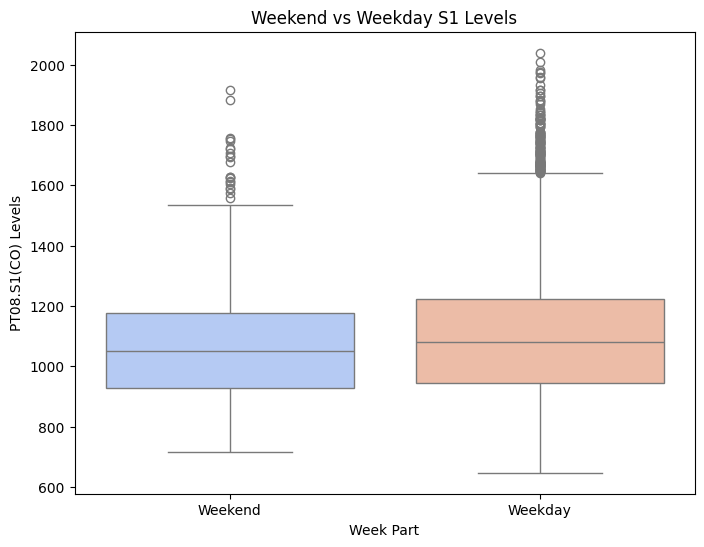

In [68]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='WeekPart', y='PT08.S1(CO)', data=df, palette='coolwarm')
plt.title('Weekend vs Weekday S1 Levels')
plt.xlabel('Week Part')
plt.ylabel('PT08.S1(CO) Levels')
plt.show()

## Hypothesis testing weekly for PT08.S2(NMHC)

In [69]:
df['WeekPart'] = df['Date Group'].apply(lambda x: 'Weekend' if x in [3, 4] else 'Weekday')

# Split data into weekdays and weekends
weekend_data = df[df['WeekPart'] == 'Weekend']['PT08.S2(NMHC)']
weekday_data = df[df['WeekPart'] == 'Weekday']['PT08.S2(NMHC)']

# Perform two-sample t-test (two-tailed)
t_stat, p_value = ttest_ind(weekend_data, weekday_data, equal_var=False)

# Display results
print(f"T-Statistic: {t_stat}")
print(f"P-Value: {p_value}")

# Interpret the p-value
alpha = 0.05  # Significance level
if p_value < alpha:
    print("Reject the null hypothesis: Weekend and weekday mean levels are significantly different.")
else:
    print("Fail to reject the null hypothesis: No significant difference in mean levels between weekends and weekdays.")

T-Statistic: -4.056338461963248
P-Value: 5.276483005759439e-05
Reject the null hypothesis: Weekend and weekday mean levels are significantly different.


<ipython-input-75-f7f475a92f5c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='WeekPart', y='PT08.S2(NMHC)', data=df, palette='coolwarm')


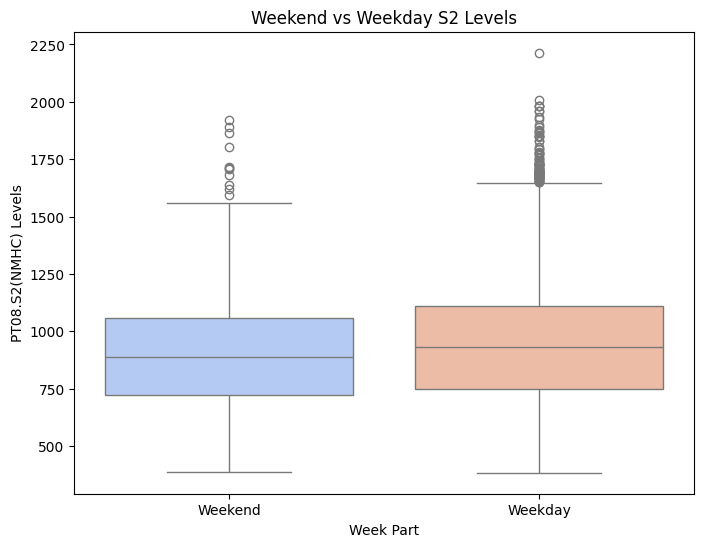

In [75]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='WeekPart', y='PT08.S2(NMHC)', data=df, palette='coolwarm')
plt.title('Weekend vs Weekday S2 Levels')
plt.xlabel('Week Part')
plt.ylabel('PT08.S2(NMHC) Levels')
plt.show()

## Hypothesis testing weekly for PT08.S3(NOx)

In [71]:
df['WeekPart'] = df['Date Group'].apply(lambda x: 'Weekend' if x in [3, 4] else 'Weekday')

# Split data into weekdays and weekends
weekend_data = df[df['WeekPart'] == 'Weekend']['PT08.S3(NOx)']
weekday_data = df[df['WeekPart'] == 'Weekday']['PT08.S3(NOx)']

# Perform two-sample t-test (two-tailed)
t_stat, p_value = ttest_ind(weekend_data, weekday_data, equal_var=False)

# Display results
print(f"T-Statistic: {t_stat}")
print(f"P-Value: {p_value}")

# Interpret the p-value
alpha = 0.05  # Significance level
if p_value < alpha:
    print("Reject the null hypothesis: Weekend and weekday mean levels are significantly different.")
else:
    print("Fail to reject the null hypothesis: No significant difference in mean levels between weekends and weekdays.")

T-Statistic: 2.710054964928678
P-Value: 0.0068159025003047494
Reject the null hypothesis: Weekend and weekday mean levels are significantly different.


<ipython-input-76-77b17c9ca151>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='WeekPart', y='PT08.S3(NOx)', data=df, palette='coolwarm')


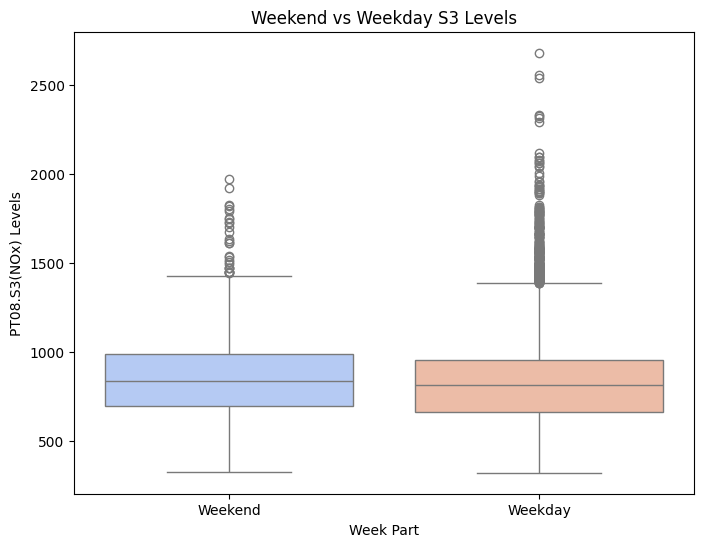

In [76]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='WeekPart', y='PT08.S3(NOx)', data=df, palette='coolwarm')
plt.title('Weekend vs Weekday S3 Levels')
plt.xlabel('Week Part')
plt.ylabel('PT08.S3(NOx) Levels')
plt.show()

## Hypothesis testing weekly for PT08.S4(NO2)

In [77]:
df['WeekPart'] = df['Date Group'].apply(lambda x: 'Weekend' if x in [3, 4] else 'Weekday')

# Split data into weekdays and weekends
weekend_data = df[df['WeekPart'] == 'Weekend']['PT08.S4(NO2)']
weekday_data = df[df['WeekPart'] == 'Weekday']['PT08.S4(NO2)']

# Perform two-sample t-test (two-tailed)
t_stat, p_value = ttest_ind(weekend_data, weekday_data, equal_var=False)

# Display results
print(f"T-Statistic: {t_stat}")
print(f"P-Value: {p_value}")

# Interpret the p-value
alpha = 0.05  # Significance level
if p_value < alpha:
    print("Reject the null hypothesis: Weekend and weekday mean levels are significantly different.")
else:
    print("Fail to reject the null hypothesis: No significant difference in mean levels between weekends and weekdays.")

T-Statistic: -2.357152442795029
P-Value: 0.018563986847323362
Reject the null hypothesis: Weekend and weekday mean levels are significantly different.


<ipython-input-78-9f604a40f866>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='WeekPart', y='PT08.S4(NO2)', data=df, palette='coolwarm')


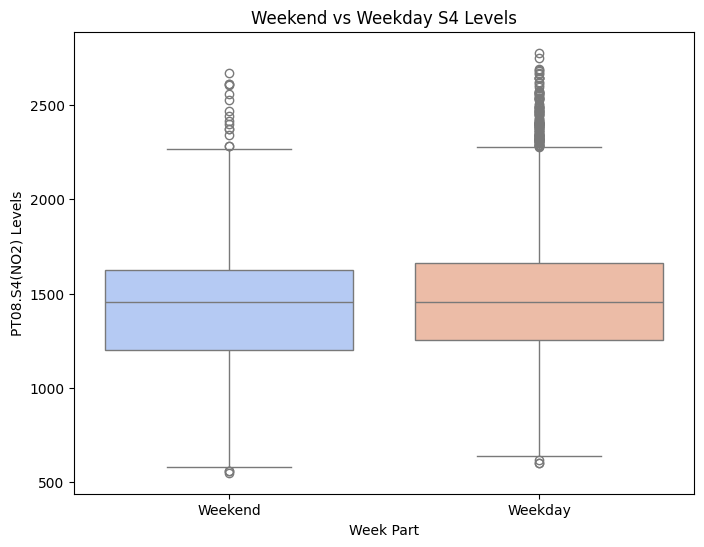

In [78]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='WeekPart', y='PT08.S4(NO2)', data=df, palette='coolwarm')
plt.title('Weekend vs Weekday S4 Levels')
plt.xlabel('Week Part')
plt.ylabel('PT08.S4(NO2) Levels')
plt.show()

## Hypothesis testing weekly for PT08.S5(O3)

In [73]:
df['WeekPart'] = df['Date Group'].apply(lambda x: 'Weekend' if x in [3, 4] else 'Weekday')

# Split data into weekdays and weekends
weekend_data = df[df['WeekPart'] == 'Weekend']['PT08.S5(O3)']
weekday_data = df[df['WeekPart'] == 'Weekday']['PT08.S5(O3)']

# Perform two-sample t-test (two-tailed)
t_stat, p_value = ttest_ind(weekend_data, weekday_data, equal_var=False)

# Display results
print(f"T-Statistic: {t_stat}")
print(f"P-Value: {p_value}")

# Interpret the p-value
alpha = 0.05  # Significance level
if p_value < alpha:
    print("Reject the null hypothesis: Weekend and weekday mean levels are significantly different.")
else:
    print("Fail to reject the null hypothesis: No significant difference in mean levels between weekends and weekdays.")

T-Statistic: -4.407051095307886
P-Value: 1.1338414678650082e-05
Reject the null hypothesis: Weekend and weekday mean levels are significantly different.


<ipython-input-74-8d0588840850>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='WeekPart', y='PT08.S5(O3)', data=df, palette='coolwarm')


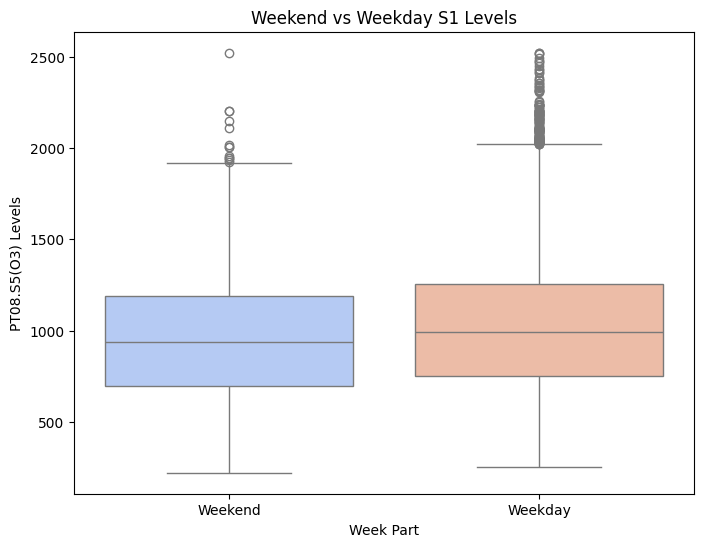

In [74]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='WeekPart', y='PT08.S5(O3)', data=df, palette='coolwarm')
plt.title('Weekend vs Weekday S1 Levels')
plt.xlabel('Week Part')
plt.ylabel('PT08.S5(O3) Levels')
plt.show()

## LSTM Model

In [79]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [80]:
# Selecting the relevant columns for sensors S1, S2, S3, S4, S5
sensor_columns = ['PT08.S1(CO)', 'PT08.S2(NMHC)', 'PT08.S3(NOx)', 'PT08.S4(NO2)', 'PT08.S5(O3)']
sensor_data = df[sensor_columns]



In [81]:
# Handling missing values (if any) by forward filling
# sensor_data = sensor_data.fillna(method='ffill')

# Scaling the data to a range of 0 to 1
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(sensor_data)

# Creating sequences for LSTM model
def create_sequences(df, sequence_length=10):
    X, y = [], []
    for i in range(len(df) - sequence_length):
        X.append(df[i:i+sequence_length])
        y.append(df[i+sequence_length])
    return np.array(X), np.array(y)



In [82]:
sequence_length = 10
X, y = create_sequences(scaled_data, sequence_length)

# Splitting the data into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

# Building the LSTM model
model = Sequential([
    LSTM(50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])),
    Dense(y_train.shape[1])
])

# Compiling the model
model.compile(optimizer='adam', loss='mse')

# Fitting the model to the training data
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Displaying the model summary
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.0364 - val_loss: 0.0060
Epoch 2/20
237/237 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0059 - val_loss: 0.0040
Epoch 3/20
237/237 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0046 - val_loss: 0.0038
Epoch 4/20
237/237 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0043 - val_loss: 0.0037
Epoch 5/20
237/237 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0042 - val_loss: 0.0034
Epoch 6/20
237/237 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0040 - val_loss: 0.0034
Epoch 7/20
237/237 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0038 - val_loss: 0.0032
Epoch 8/20
237/237 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0038 - val_loss: 0.0032
Epoch 9/20
237/237 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.0035 - val_loss: 0.0033
Epoch 10/20
237/237 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0038 - val_loss: 0.0031
Epoch 11/20
237/237 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0036 - val_loss: 0.0030
Epoch 12/20
237/237 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 50)                  │          11,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 5)                   │             255 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 34,367 (134.25 KB)

 Trainable params: 11,455 (44.75 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 22,912 (89.50 KB)